In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import model_selection, feature_selection, ensemble, linear_model, metrics
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso
import sklearn_relief as sr

In [2]:
df = pd.read_excel("trainDataset.xls")
df.drop('ID', axis=1, inplace=True)
df.drop('pCR (outcome)', axis=1, inplace=True)
# replace nan values with 999
all_df = df.replace(999, np.nan)
df= df.rename(columns={"RelapseFreeSurvival (outcome)":"Y"})
df.head()

,Y,Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,LNStatus,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,144.0,41.0,0,0.0,0.0,1.0,3,3,1,1,...,0.517172,0.375126,3.325332,0.002314,3880771.500,473.464852,0.000768,0.182615,0.030508,0.000758
1,142.0,39.0,1,1.0,0.0,0.0,3,3,1,1,...,0.444391,0.444391,3.032144,0.005612,2372009.744,59.459710,0.004383,0.032012,0.001006,0.003685
2,135.0,31.0,0,0.0,0.0,1.0,2,1,1,0,...,0.534549,0.534549,2.485848,0.006752,1540027.421,33.935384,0.007584,0.024062,0.000529,0.006447
3,12.0,35.0,0,0.0,0.0,1.0,3,3,1,1,...,0.506185,0.506185,2.606255,0.003755,6936740.794,46.859265,0.005424,0.013707,0.000178,0.004543
4,109.0,61.0,1,0.0,0.0,0.0,2,1,1,0,...,0.462282,0.462282,2.809279,0.006521,1265399.054,39.621023,0.006585,0.034148,0.001083,0.005626


In [3]:
df.describe()

,Y,Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,LNStatus,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
count,400.000000,400.000000,400.000000,399.000000,399.000000,399.000000,400.000000,400.000000,400.000000,400.00000,...,4.000000e+02,4.000000e+02,4.000000e+02,400.000000,4.000000e+02,400.000000,400.000000,400.000000,400.000000,400.000000
mean,56.159792,51.851171,0.540000,0.403509,0.313283,0.333333,9.880000,6.577500,8.625000,3.01500,...,3.945420e-01,3.899257e-01,2.711993e+00,0.003314,5.683152e+07,176.969142,32500.032680,0.056721,0.005948,0.029385
std,26.763774,10.864462,0.499022,0.491217,0.464411,0.471996,86.092482,70.443308,86.200962,49.92656,...,1.674769e-01,1.624792e-01,7.556631e-01,0.002412,7.063822e+08,1045.305721,177545.921557,0.047363,0.008416,0.115909
min,5.000000,23.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.00000,...,7.050000e-11,7.050000e-11,-3.200000e-16,0.000008,0.000000e+00,0.000000,0.000248,0.000000,0.000000,0.000000
25%,38.000000,44.616016,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,0.00000,...,3.199017e-01,3.175584e-01,2.330664e+00,0.001334,1.078546e+06,18.628013,0.001851,0.018628,0.000310,0.001535
50%,55.041667,51.119781,1.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.00000,...,4.095627e-01,4.054695e-01,2.807355e+00,0.002888,3.366594e+06,66.507214,0.004399,0.047029,0.002301,0.003384
75%,73.000000,60.000000,1.000000,1.000000,1.000000,1.000000,3.000000,2.000000,1.000000,1.00000,...,5.000660e-01,4.962633e-01,3.277613e+00,0.004707,9.231697e+06,154.300334,0.013846,0.084418,0.007873,0.009558
max,144.000000,79.603012,1.000000,1.000000,1.000000,1.000000,999.000000,999.000000,999.000000,999.00000,...,8.773779e-01,8.571429e-01,4.947427e+00,0.011301,1.390001e+10,20764.693790,1000000.000000,0.285100,0.060742,1.145601


---
# Correlation Checking - non-nan features

In [4]:
# preprocessing feature "age"
# group age by the interval of 10 years and count
ranges = [20,30,40,50,60,70,80]
df['Age'].groupby(pd.cut(df.Age, ranges)).count()

Age
(20, 30]      5
(30, 40]     58
(40, 50]    120
(50, 60]    119
(60, 70]     79
(70, 80]     19
Name: Age, dtype: int64

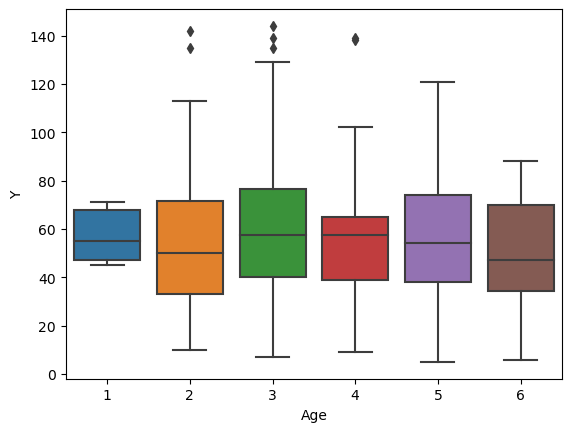

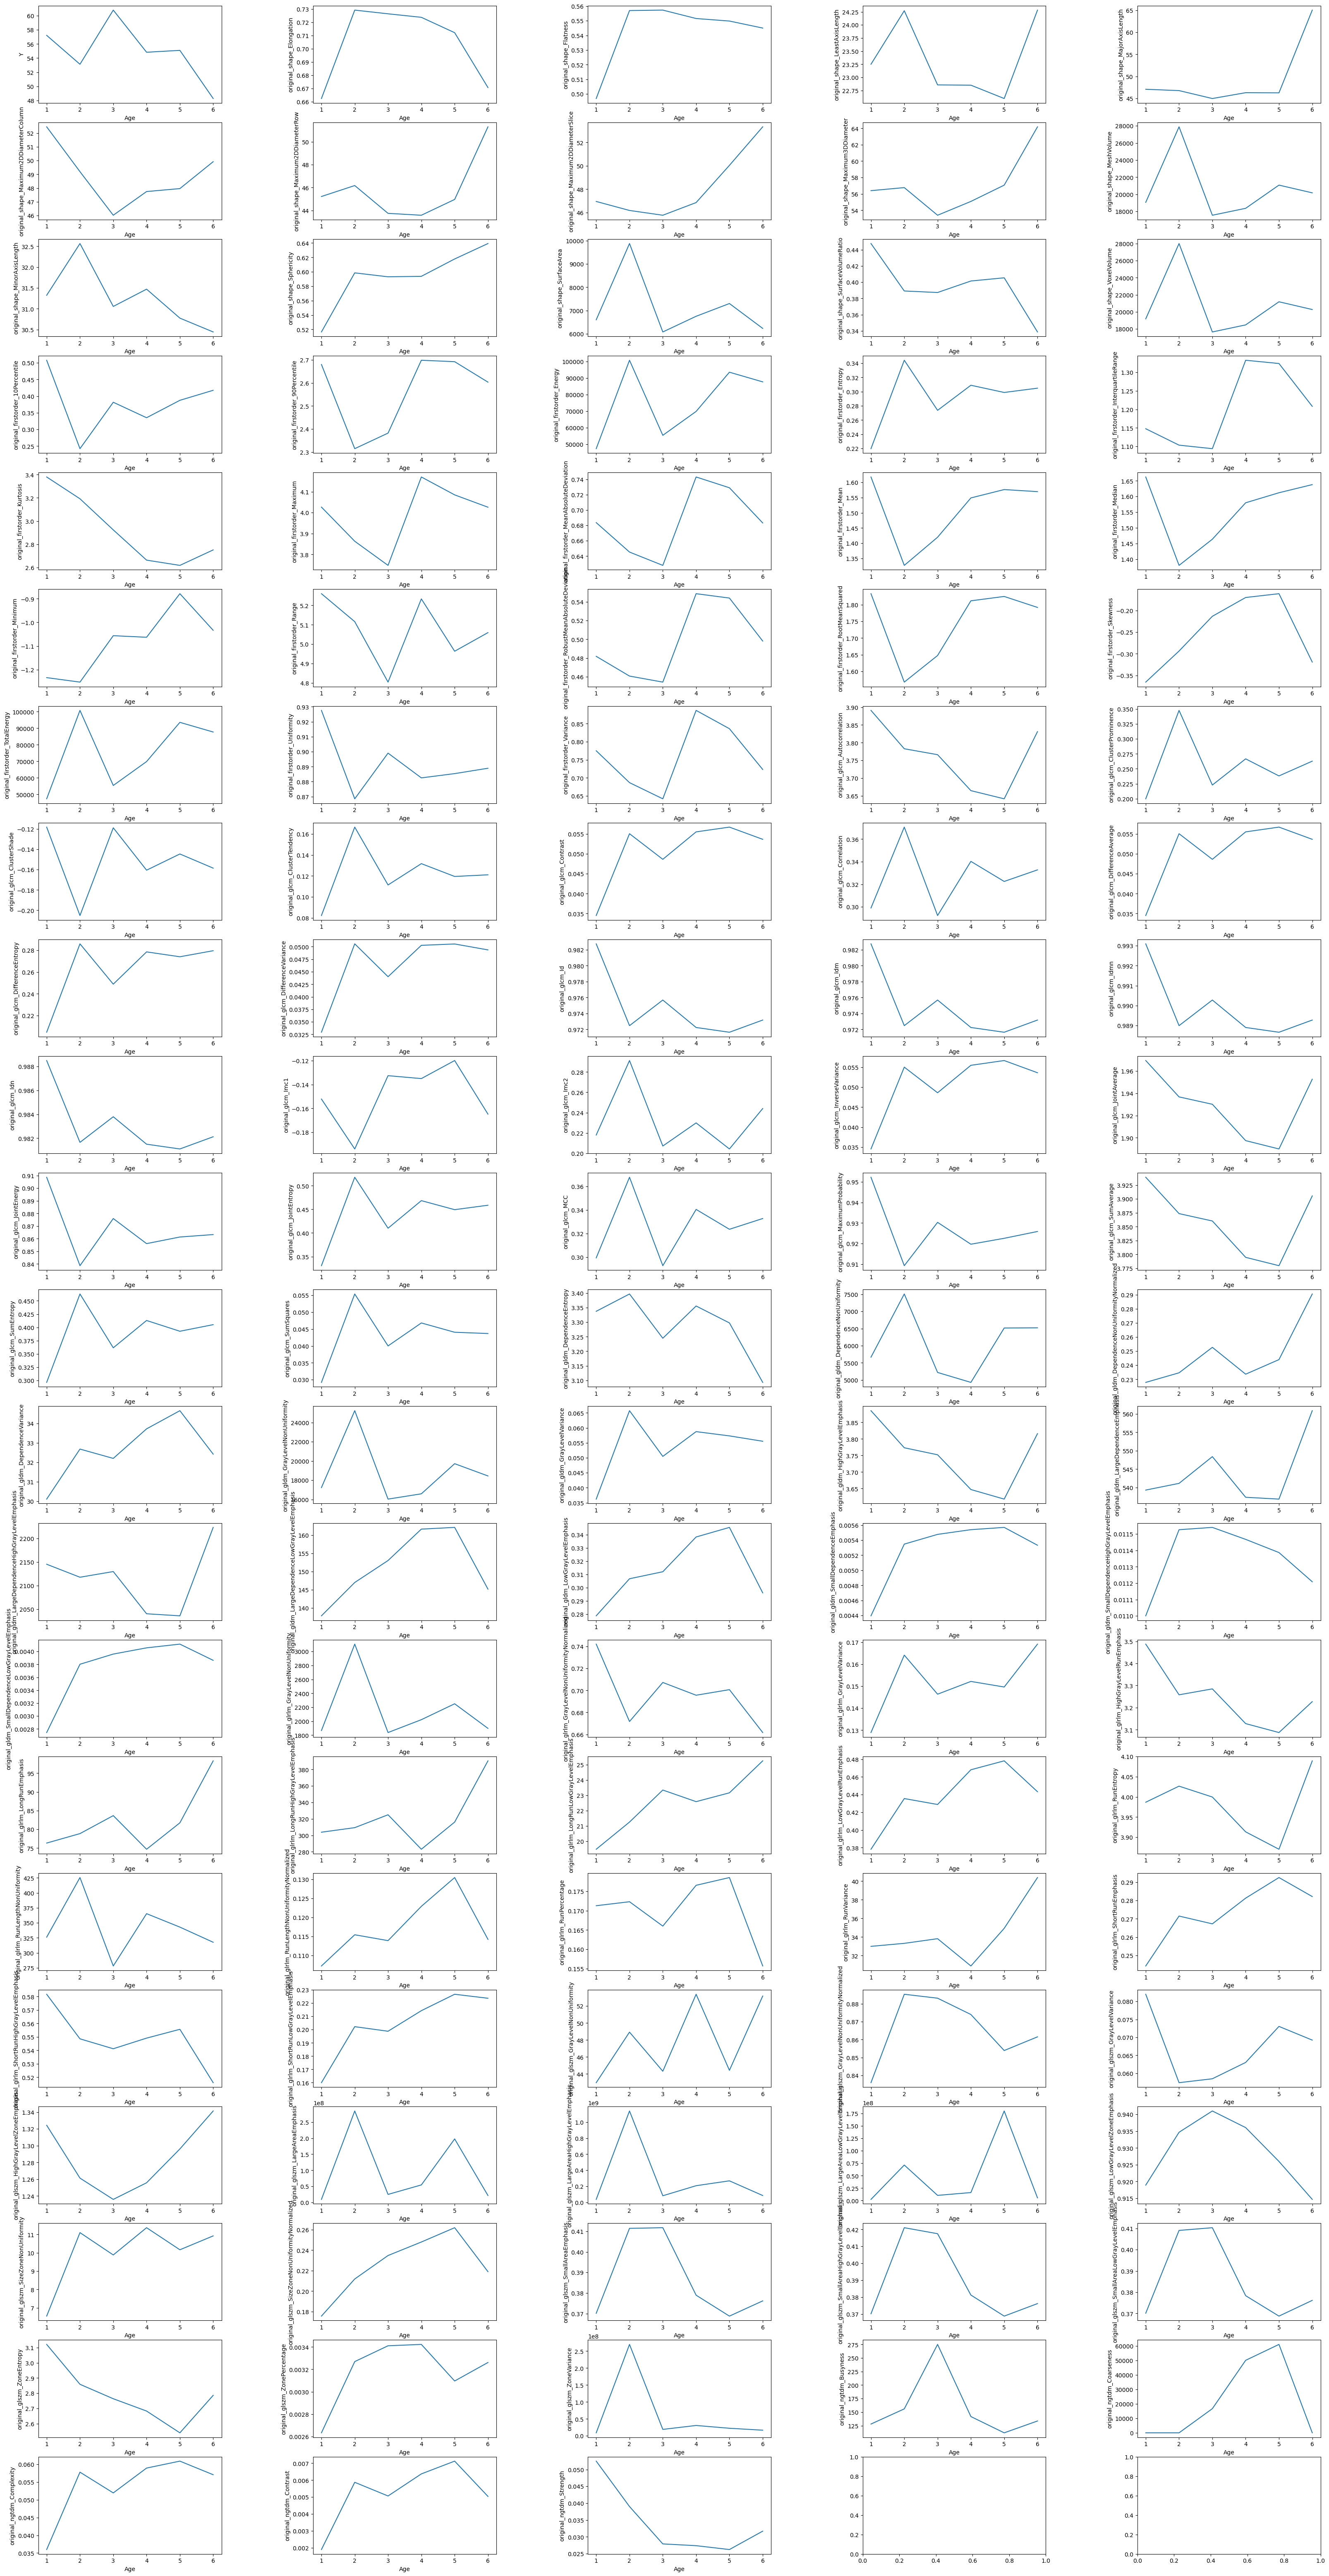

In [5]:
drop_cols = df.iloc[:, 2:11]
dataFrame = df.drop(drop_cols, axis=1)

# group age into labels 1 to 6
dataFrame['Age']= pd.cut(dataFrame['Age'], bins=[20,30,40,50,60,70,80], right=False, labels=[1, 2, 3, 4, 5, 6])
sns.boxplot(x = dataFrame['Age'],y=dataFrame['Y'])

#use box plot to check the value range and outliers of each featue

g1 = dataFrame.loc[dataFrame['Age'] == 1].mean()
g2 = dataFrame.loc[dataFrame['Age'] == 2].mean()
g3 = dataFrame.loc[dataFrame['Age'] == 3].mean()
g4 = dataFrame.loc[dataFrame['Age'] == 4].mean()
g5 = dataFrame.loc[dataFrame['Age'] == 5].mean()
g6 = dataFrame.loc[dataFrame['Age'] == 6].mean()

cols = dataFrame.drop('Age', axis=1).columns
age_df = pd.DataFrame([g1,g2,g3,g4,g5,g6], columns=cols)
age_df.insert(0,'Age',[1,2,3,4,5,6])

#use the boxplots to see if certain feature can discriminate between benign and malignant
fig,axes = plt.subplots(nrows=22,ncols=5,figsize=(40,80))
fig.subplots_adjust(hspace=.2,wspace=.5)
axes=axes.ravel()

for i, col in enumerate(age_df.columns[1:]):
    _=sns.lineplot(y=col, x='Age',data=age_df,ax=axes[i])

In [6]:
## standard scaler for image features
df_image = df.iloc[:,11:]
scalar = StandardScaler()
df_cols = df_image.columns.tolist()
scaled_data = pd.DataFrame(scalar.fit_transform(df_image), columns=df_cols)
scaled_data
## PCA to do reduction on each type of image features

#normalisation for non-image, non-categorical features
df_pca = df.iloc[:,:2]
df_pca = pd.DataFrame(scalar.fit_transform(df_pca), columns=df_pca.columns.tolist())
df_pca = pd.concat([df_pca, df.iloc[:,2:11]], axis=1)
df_pca

,Y,Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,LNStatus,TumourStage
0,3.286166,-1.000027,0,0.0,0.0,1.0,3,3,1,1,2
1,3.211345,-1.184344,1,1.0,0.0,0.0,3,3,1,1,2
2,2.949470,-1.921612,0,0.0,0.0,1.0,2,1,1,0,2
3,-1.652050,-1.552978,0,0.0,0.0,1.0,3,3,1,1,3
4,1.976791,0.843142,1,0.0,0.0,0.0,2,1,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...
395,-0.258500,-0.530019,0,0.0,0.0,1.0,3,3,1,1,4
396,-0.286558,0.133522,0,0.0,0.0,1.0,2,1,1,0,2
397,-0.323969,1.561978,1,0.0,0.0,0.0,3,3,1,1,3
398,-0.345792,-0.539235,1,0.0,0.0,0.0,2,1,1,1,2


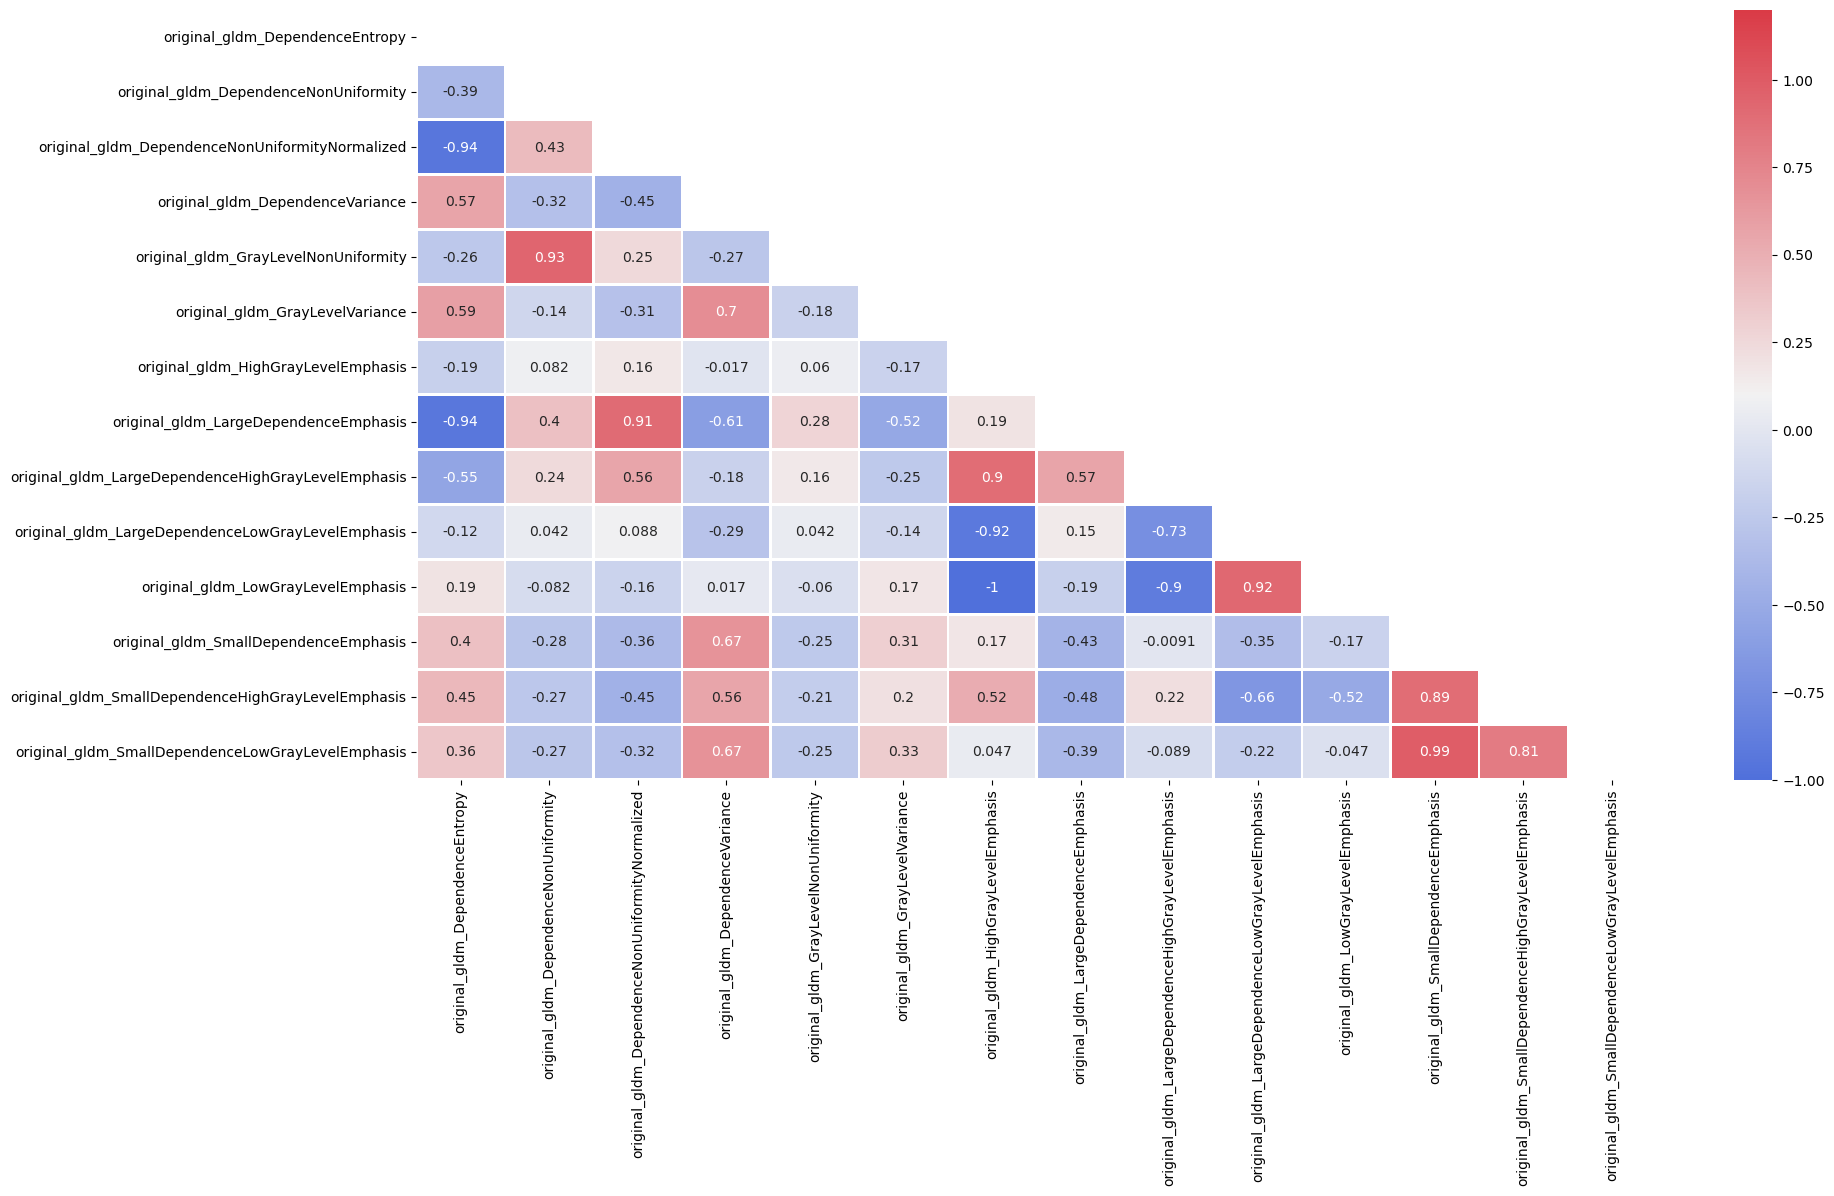

In [7]:
#from graphs above, we spotted that there may be some correlations between image features
#draw heatmap for different type of image features (7 types)
shape_df = scaled_data.iloc[:,0:14]
firstorder_df = scaled_data.iloc[:,14:32]
glcm_df = scaled_data.iloc[:,32:56]
gldm_df = scaled_data.iloc[:,56:70]
glrlm_df = scaled_data.iloc[:,70:86]
glszm_df = scaled_data.iloc[:,86:102]
ngtdm_df = scaled_data.iloc[:,102:]
##compute the correlation matrix to observe the correlations between pair of features
corrMatt = gldm_df.corr()

#Generate a mask for the upper triangle
mask = np.zeros_like(corrMatt)
mask[np.triu_indices_from(mask)] = True

#Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(20,10))

#Generate a custom diverging colormap
cmap = sns.diverging_palette(260,10,as_cmap=True)

#Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corrMatt, vmax=1.2,square=False,cmap=cmap,mask=mask,ax=ax,annot=True,fmt='.2g',linewidths=1)


# fig,ax= plt.subplots(nrows=3,ncols =3,sharex =False, sharey= False)
# fig.suptitle("Breast Cancer Image Feature Correlation", fontsize =20)

# i = 0
# titles = ['shape', 'firstorder','glcm', 'gldm', 'glrlm', 'glszm', 'ngtdm']

# draw_corr(shape_df,ax[0,0])
# draw_corr(firstorder_df,ax[0,1])
# draw_corr(glcm_df,ax[0,2])
# draw_corr(gldm_df,ax[1,0])
# draw_corr(glrlm_df,ax[1,1])
# draw_corr(glszm_df,ax[1,2])
# draw_corr(ngtdm_df,ax[2,0])

# for i, tit in enumerate(titles):
#     ax[i].title.set_text(tit)
#     ax[i].grid(True)

# plt.show()

# Conclusion - could do dimension reduction on shape


In [8]:
#pca set up
pca = PCA(n_components = 0.85, svd_solver='full')

In [9]:
#shape features are highly correlated
    #Applying PCA
pca.fit(shape_df)
shape_pca = pca.transform(shape_df)
shape_pca.shape

shape_pca = pd.DataFrame(shape_pca, columns=['shape_PC1','shape_PC2','shape_PC3'])
shape_pca

,shape_PC1,shape_PC2,shape_PC3
0,-1.317149,1.535464,-0.687496
1,-0.342770,-0.340519,-0.343955
2,-0.951267,-0.071311,-0.145338
3,1.368046,0.069716,-0.421970
4,-1.917008,1.463455,-0.345259
...,...,...,...
395,2.411000,-1.054961,0.495038
396,-3.029319,-1.786749,2.209570
397,-0.421285,2.582419,-0.957899
398,-1.431363,-2.494013,1.441138


In [10]:
#first_order features are highly correlated 
    #Applying PCA
pca.fit(firstorder_df)
firstorder_pca = pca.transform(firstorder_df)
firstorder_pca.shape
firstorder_pca = pd.DataFrame(firstorder_pca,columns=['firstorder_PC1','firstorder_PC2','firstorder_PC3'])
firstorder_pca

,firstorder_PC1,firstorder_PC2,firstorder_PC3
0,-6.430842,1.747316,2.875226
1,-1.299775,-1.935955,0.533117
2,-2.295770,-1.963495,1.976563
3,-1.828998,-2.647409,-0.013912
4,-3.036988,-1.528892,-0.304777
...,...,...,...
395,1.531527,-0.833981,0.256785
396,1.039586,-1.133747,-1.712649
397,-2.289235,-0.008627,0.852548
398,0.660558,-1.244852,-1.149113


In [11]:
#glcm features are highly correlated 
    #Applying PCA
pca.fit(glcm_df)
glcm_pca = pca.transform(glcm_df)
glcm_pca.shape
glcm_pca = pd.DataFrame(glcm_pca,columns=['glcm_PC1','glcm_PC2'])
glcm_pca

,glcm_PC1,glcm_PC2
0,10.616440,-0.584634
1,-2.781189,-0.959968
2,-3.493434,-1.010754
3,-4.154215,-0.948076
4,-2.731633,-0.989579
...,...,...
395,-1.197826,1.096946
396,-4.647617,-1.121631
397,2.505714,1.313799
398,-3.663385,-1.020237


In [12]:
##gldm are correlated
#Applying PCA
pca.fit(gldm_df)
gldm_pca = pca.transform(gldm_df)
gldm_pca.shape
gldm_pca = pd.DataFrame(gldm_pca,columns=['gldm_PC1','gldm_PC2','gldm_PC3', 'gldm_PC4'])
gldm_pca

,gldm_PC1,gldm_PC2,gldm_PC3,gldm_PC4
0,-3.195214,1.663055,0.703915,-1.775610
1,0.917072,-1.261718,-0.541560,1.232289
2,0.564265,-1.426522,-0.642222,1.389567
3,2.140253,-1.052985,-0.424416,0.370283
4,0.839029,-1.512321,-0.703493,1.864667
...,...,...,...,...
395,0.146993,0.256650,-0.322069,-2.253849
396,-1.526196,-0.195638,-0.692594,-1.966893
397,2.239971,0.320857,-0.434813,-1.140513
398,-2.141868,-0.871089,-0.364151,-0.221038


In [13]:
#glrlm features are highly correlated 
    #Applying PCA
pca.fit(glrlm_df)
glrlm_pca = pca.transform(glrlm_df)
glrlm_pca.shape
glrlm_pca = pd.DataFrame(glrlm_pca,columns=['glrlm_PC1','glrlm_PC2','glrlm_PC3','glrlm_PC4'])
glrlm_pca

,glrlm_PC1,glrlm_PC2,glrlm_PC3,glrlm_PC4
0,-3.814901,0.588521,0.922278,0.377807
1,1.704626,0.514622,-0.331453,-0.807034
2,1.887126,-0.363416,-0.179017,-0.803687
3,3.493367,-0.243413,-0.198145,-0.481463
4,1.341119,0.587743,-0.381023,-0.957581
...,...,...,...,...
395,0.541600,-2.313434,0.777883,0.533866
396,-0.713893,-4.400516,0.585934,0.029822
397,2.976741,0.895994,-0.893223,-0.604016
398,-0.319935,-3.263101,0.416120,-0.131221


In [14]:
#glszm some of them are highly correlated
pca.fit(glszm_df)
glszm_pca = pca.transform(glszm_df)
glszm_pca.shape
glszm_pca = pd.DataFrame(glszm_pca, columns=['glszm_PC1','glszm_PC2','glszm_PC3', 'glszm_PC4', 'glszm_PC5'])
glszm_pca

,glszm_PC1,glszm_PC2,glszm_PC3,glszm_PC4,glszm_PC5
0,0.114553,-0.315195,0.025648,-0.564990,-0.766362
1,-1.842358,0.036796,-0.346902,-0.054927,-0.080795
2,-2.263479,0.206806,0.895278,0.154771,0.205248
3,-2.144948,0.250169,0.445018,0.086536,0.546642
4,-1.723443,0.034458,0.044112,0.122067,-0.294211
...,...,...,...,...,...
395,-0.752814,0.013030,-0.199091,0.291262,-0.861177
396,2.358107,-0.465483,3.286516,-0.498489,0.186796
397,-0.166830,-0.202437,-1.670143,0.100867,-1.024121
398,-1.938428,0.364315,2.993387,0.738278,-0.248547


In [15]:
#ngtdm features are correlated 
    #Applying PCA
pca = PCA(n_components = 0.85, svd_solver='full')
pca.fit(ngtdm_df)
ngtdm_pca = pca.transform(ngtdm_df)
ngtdm_pca.shape
ngtdm_pca = pd.DataFrame(ngtdm_pca,columns=['ngtdm_PC1','ngtdm_PC2','ngtdm_PC3','ngtdm_PC4'])
ngtdm_pca

,ngtdm_PC1,ngtdm_PC2,ngtdm_PC3,ngtdm_PC4
0,3.711929,0.011982,-0.106560,-1.405935
1,-0.660533,-0.022824,-0.278072,0.447110
2,-0.816512,-0.008657,-0.268030,0.489189
3,-0.973774,-0.021444,-0.250253,0.583694
4,-0.636389,-0.011374,-0.284988,0.410507
...,...,...,...,...
395,-0.764765,-0.027395,-0.254498,0.516082
396,-1.505064,1.292959,0.812111,-0.256026
397,-0.110128,-0.029125,-0.222782,0.303115
398,-0.943323,0.084365,-0.196369,0.454707


In [16]:
## cat all image pca features and non-image features in df
df_pca = pd.concat([df_pca, shape_pca,firstorder_pca,glcm_pca,gldm_pca,glrlm_pca,glszm_pca,ngtdm_pca], axis=1)
df_pca

,Y,Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,LNStatus,...,glrlm_PC4,glszm_PC1,glszm_PC2,glszm_PC3,glszm_PC4,glszm_PC5,ngtdm_PC1,ngtdm_PC2,ngtdm_PC3,ngtdm_PC4
0,3.286166,-1.000027,0,0.0,0.0,1.0,3,3,1,1,...,0.377807,0.114553,-0.315195,0.025648,-0.564990,-0.766362,3.711929,0.011982,-0.106560,-1.405935
1,3.211345,-1.184344,1,1.0,0.0,0.0,3,3,1,1,...,-0.807034,-1.842358,0.036796,-0.346902,-0.054927,-0.080795,-0.660533,-0.022824,-0.278072,0.447110
2,2.949470,-1.921612,0,0.0,0.0,1.0,2,1,1,0,...,-0.803687,-2.263479,0.206806,0.895278,0.154771,0.205248,-0.816512,-0.008657,-0.268030,0.489189
3,-1.652050,-1.552978,0,0.0,0.0,1.0,3,3,1,1,...,-0.481463,-2.144948,0.250169,0.445018,0.086536,0.546642,-0.973774,-0.021444,-0.250253,0.583694
4,1.976791,0.843142,1,0.0,0.0,0.0,2,1,1,0,...,-0.957581,-1.723443,0.034458,0.044112,0.122067,-0.294211,-0.636389,-0.011374,-0.284988,0.410507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,-0.258500,-0.530019,0,0.0,0.0,1.0,3,3,1,1,...,0.533866,-0.752814,0.013030,-0.199091,0.291262,-0.861177,-0.764765,-0.027395,-0.254498,0.516082
396,-0.286558,0.133522,0,0.0,0.0,1.0,2,1,1,0,...,0.029822,2.358107,-0.465483,3.286516,-0.498489,0.186796,-1.505064,1.292959,0.812111,-0.256026
397,-0.323969,1.561978,1,0.0,0.0,0.0,3,3,1,1,...,-0.604016,-0.166830,-0.202437,-1.670143,0.100867,-1.024121,-0.110128,-0.029125,-0.222782,0.303115
398,-0.345792,-0.539235,1,0.0,0.0,0.0,2,1,1,1,...,-0.131221,-1.938428,0.364315,2.993387,0.738278,-0.248547,-0.943323,0.084365,-0.196369,0.454707


---
# Deal with Missing Value

In [17]:
df_pca = df_pca.replace(999,np.nan)
df_pca.columns[df_pca.isna().any()].tolist()

['PgR',
 'HER2',
 'TrippleNegative',
 'ChemoGrade',
 'Proliferation',
 'HistologyType',
 'LNStatus']

In [18]:
data_mean = df_pca.iloc[:,3:10]
data_mean.describe()

,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,LNStatus
count,399.000000,399.000000,399.000000,397.000000,398.000000,397.000000,399.000000
mean,0.403509,0.313283,0.333333,2.405542,1.590452,1.141058,0.518797
std,0.491217,0.464411,0.471996,0.501784,0.774668,0.348521,0.500274
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,3.000000,2.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,3.000000,3.000000,2.000000,1.000000


PgR                   AxesSubplot(0.125,0.798085;0.168478x0.0819149)
HER2               AxesSubplot(0.327174,0.798085;0.168478x0.0819149)
TrippleNegative    AxesSubplot(0.529348,0.798085;0.168478x0.0819149)
ChemoGrade         AxesSubplot(0.731522,0.798085;0.168478x0.0819149)
Proliferation         AxesSubplot(0.125,0.699787;0.168478x0.0819149)
HistologyType      AxesSubplot(0.327174,0.699787;0.168478x0.0819149)
LNStatus           AxesSubplot(0.529348,0.699787;0.168478x0.0819149)
dtype: object

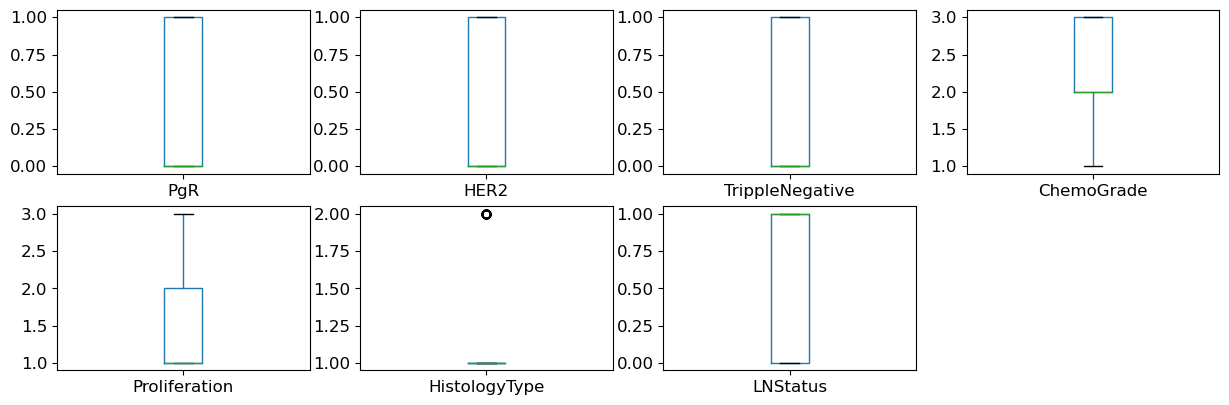

In [19]:
# use box plot to check the value range and outliers of each feature
# data_mean = df_pca.iloc[:,3:10]
data_mean.plot(kind='box',subplots=True,layout=(8,4),sharex=False, sharey=False, fontsize=12,figsize=(15,20))

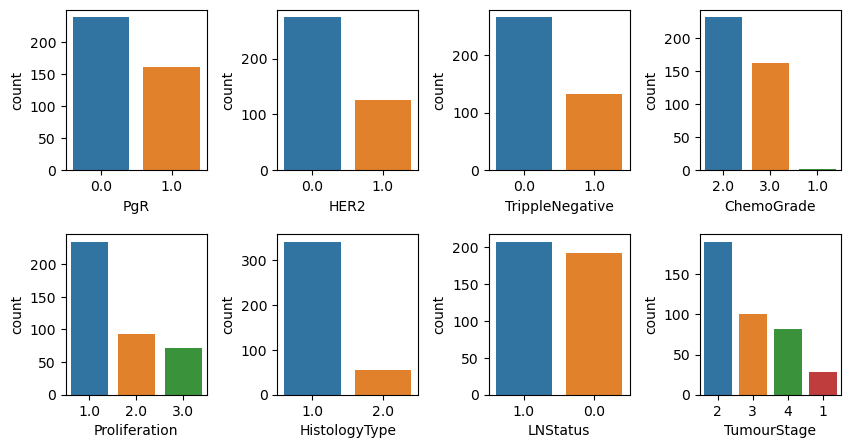

In [20]:
# count and plot the distribution of each feature (with na values)
data_mean = df_pca.iloc[:,3:11]
max_shape = np.ceil(data_mean.shape[1] / 4)
fig = plt.figure(figsize=(10,5))
fig.subplots_adjust(hspace=.4,wspace=.5)
for i, col in enumerate(data_mean.columns):
    plt.subplot(max_shape, 4, i+1)
    _ = sns.countplot(x = col, data = data_mean, order=df_pca[col].value_counts().index)
max_shape
plt.show()

In [21]:
# count numbers of na values before missing value replacement
print("Nones: ",data_mean.isnull().sum())
data_mean.head()

Nones:  PgR                1
HER2               1
TrippleNegative    1
ChemoGrade         3
Proliferation      2
HistologyType      3
LNStatus           1
TumourStage        0
dtype: int64


,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,LNStatus,TumourStage
0,0.0,0.0,1.0,3.0,3.0,1.0,1.0,2
1,1.0,0.0,0.0,3.0,3.0,1.0,1.0,2
2,0.0,0.0,1.0,2.0,1.0,1.0,0.0,2
3,0.0,0.0,1.0,3.0,3.0,1.0,1.0,3
4,0.0,0.0,0.0,2.0,1.0,1.0,0.0,2


In [22]:
# ChemoGrade, Proliferation, HistologyType have outliers
# others replace nan using mean value
# PgR, HER2, TrippleNegative, LNStatus
# df["PgR"] = df["PgR"].fillna(df["PgR"].mean())
# df["HER2"] = df["HER2"].fillna(df["HER2"].mean())
# df["TrippleNegative"] = df["TrippleNegative"].fillna(df["TrippleNegative"].mean())
# df["LNStatus"] = df["LNStatus"].fillna(df["LNStatus"].mean())
# df["HistologyType"] = df["HistologyType"].fillna(df["HistologyType"].mode()[0])
# df["ChemoGrade"] = df["ChemoGrade"].fillna(df["ChemoGrade"].mode()[0])
# df["Proliferation"] = df["Proliferation"].fillna(df["Proliferation"].mode()[0])

0


,Y,Age,ER,TumourStage,shape_PC1,shape_PC2,shape_PC3,firstorder_PC1,firstorder_PC2,firstorder_PC3,...,ngtdm_PC2,ngtdm_PC3,ngtdm_PC4,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,LNStatus
0,3.286166,-1.000027,0,2,-1.317149,1.535464,-0.687496,-6.430842,1.747316,2.875226,...,0.011982,-0.106560,-1.405935,0.0,0.0,1.0,3.0,3.0,1.0,1.0
1,3.211345,-1.184344,1,2,-0.342770,-0.340519,-0.343955,-1.299775,-1.935955,0.533117,...,-0.022824,-0.278072,0.447110,1.0,0.0,0.0,3.0,3.0,1.0,1.0
2,2.949470,-1.921612,0,2,-0.951267,-0.071311,-0.145338,-2.295770,-1.963495,1.976563,...,-0.008657,-0.268030,0.489189,0.0,0.0,1.0,2.0,1.0,1.0,0.0
3,-1.652050,-1.552978,0,3,1.368046,0.069716,-0.421970,-1.828998,-2.647409,-0.013912,...,-0.021444,-0.250253,0.583694,0.0,0.0,1.0,3.0,3.0,1.0,1.0
4,1.976791,0.843142,1,2,-1.917008,1.463455,-0.345259,-3.036988,-1.528892,-0.304777,...,-0.011374,-0.284988,0.410507,0.0,0.0,0.0,2.0,1.0,1.0,0.0


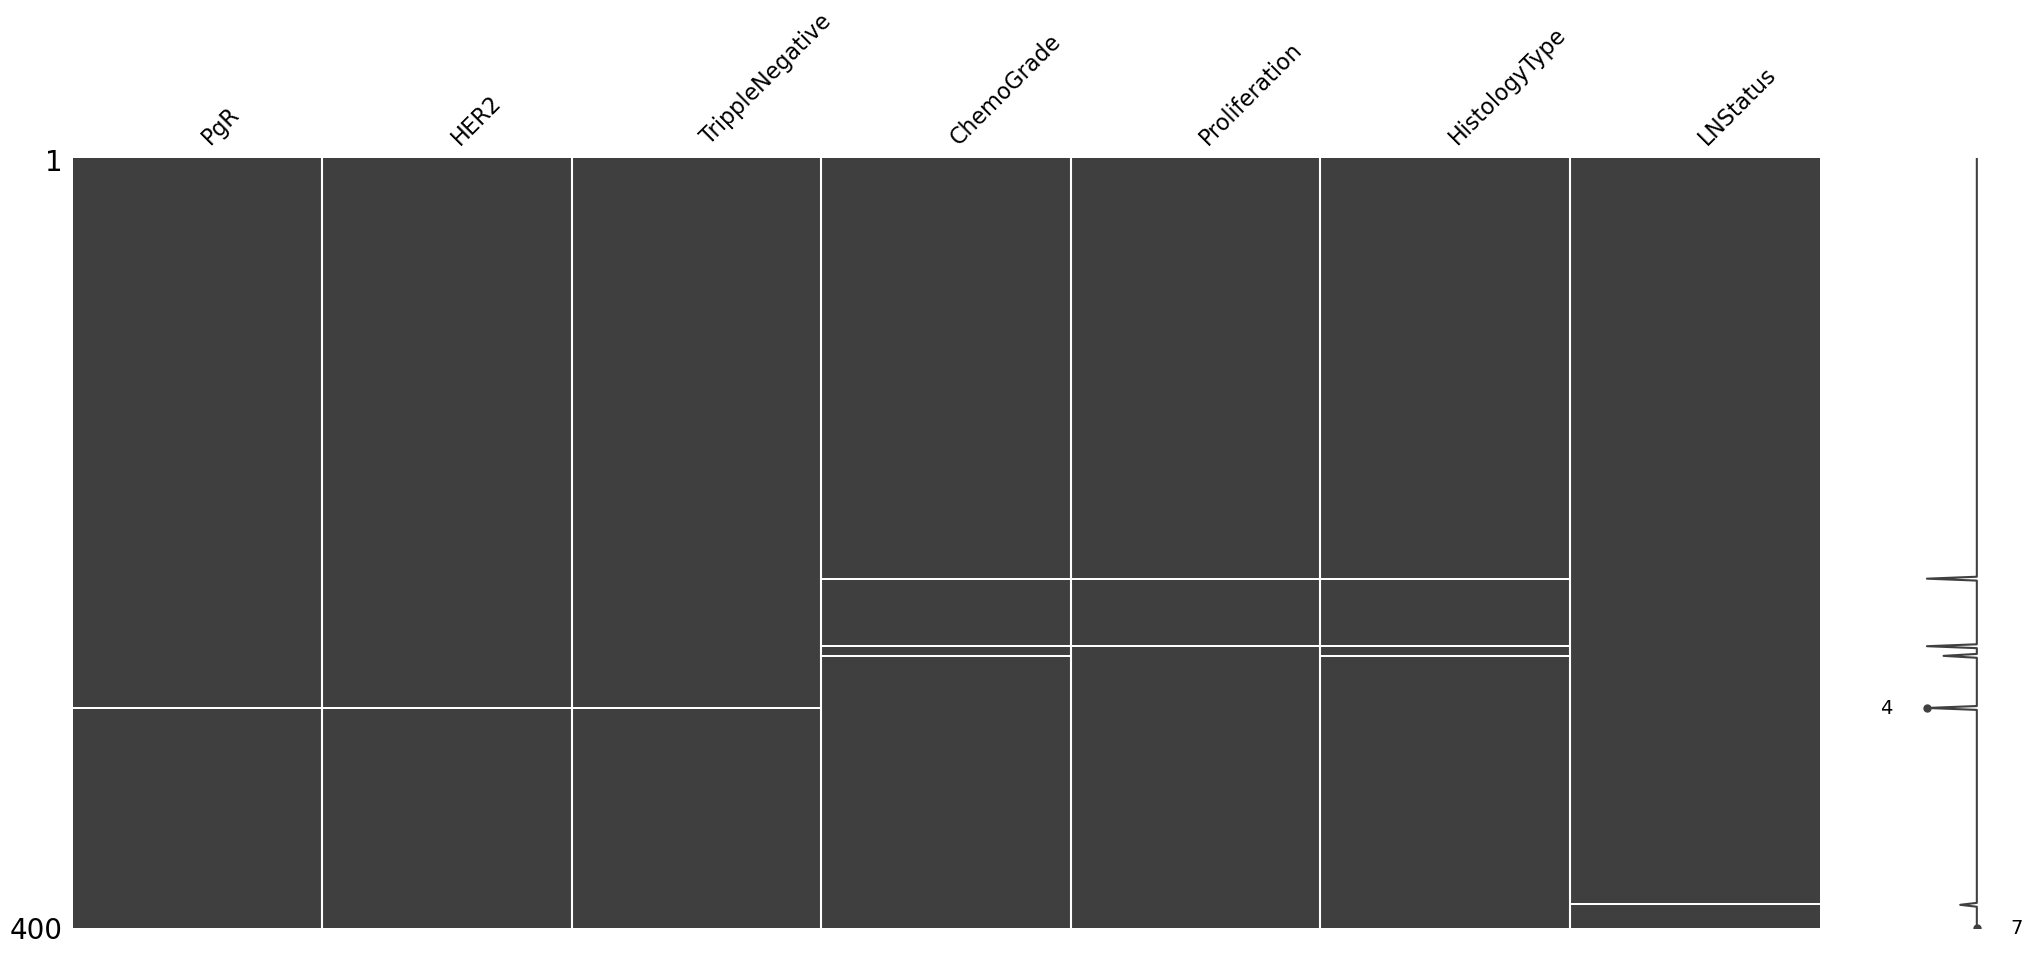

In [23]:
import missingno as msno
null_cols = df_pca.columns[df_pca.isnull().any()]
msno.matrix(df_pca[null_cols])

#knn imputer

from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=10)

result = imputer.fit_transform(df_pca)
nonNulldataFrame = pd.DataFrame(result, columns= df_pca.columns.tolist())
nonNulldataFrame = nonNulldataFrame[null_cols].apply(lambda x: round(x))
df_pca = df_pca.drop(null_cols, axis=1)
df_pca = pd.concat([df_pca, nonNulldataFrame], axis=1)
#checking for missing
#nonNulldataFrame.to_csv("test.csv")
print(nonNulldataFrame.isnull().sum().sum())
df_pca.head()

In [24]:
df_pca.isnull().sum().sum()

0

---
# Categorical Correlation Checking after missing value replacement

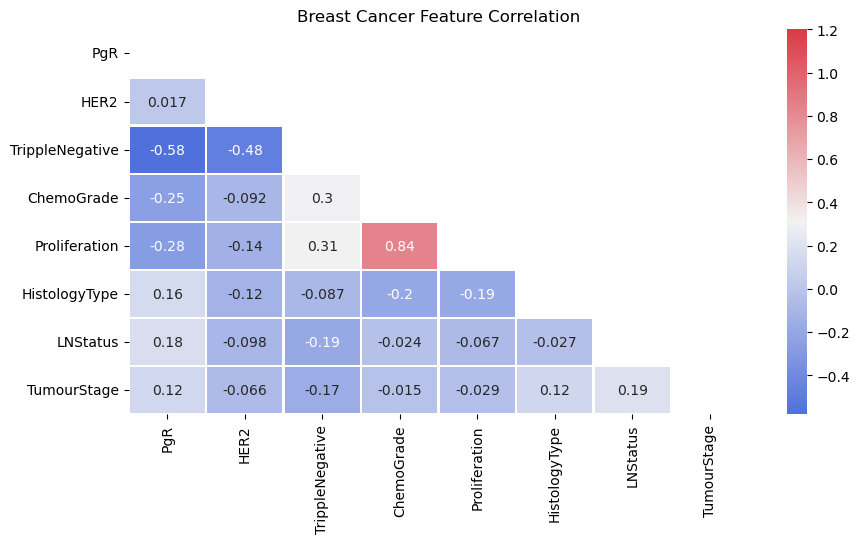

In [25]:
##compute the correlation matrix to observe the correlations between pair of features
corrMatt = data_mean.corr()

#Generate a mask for the upper triangle
mask = np.zeros_like(corrMatt)
mask[np.triu_indices_from(mask)] = True

#Set up the matplotlib figure
fig,ax = plt.subplots(figsize=(10,5))
plt.title("Breast Cancer Feature Correlation")

#Generate a custom diverging colormap
cmap = sns.diverging_palette(260,10,as_cmap=True)

#Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corrMatt, vmax=1.2,square=False,cmap=cmap,mask=mask,ax=ax,annot=True,fmt='.2g',linewidths=1)

c:\Users\27571\anaconda3\envs\mle_tf\lib\site-packages\ipykernel_launcher.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  if __name__ == "__main__":
c:\Users\27571\anaconda3\envs\mle_tf\lib\site-packages\ipykernel_launcher.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  if __name__ == "__main__"

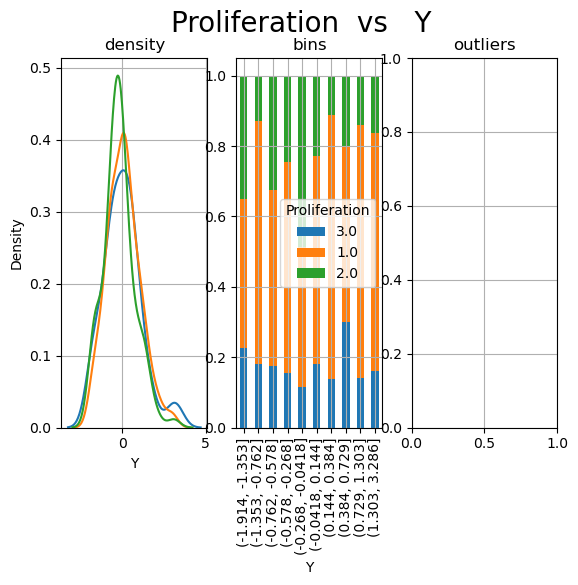

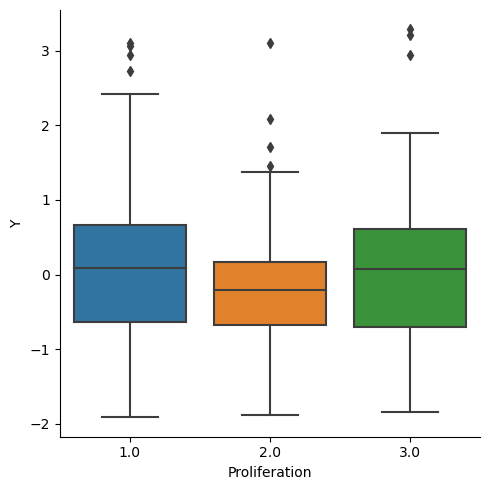

In [26]:
# check correlation between proliferation and Y label
cat, num = "Proliferation", 'Y'
fig,ax= plt.subplots(nrows=1,ncols =3,sharex =False, sharey= False)
fig.suptitle(cat+"  vs   "+num, fontsize =20)

#distribution
ax[0].title.set_text('density')
for i in df_pca[cat].unique():
    sns.distplot(df_pca[df_pca[cat]==i][num],hist=False,label=i,ax=ax[0])
ax[0].grid(True)

### stacked
ax[1].title.set_text('bins')
breaks = np.quantile(df_pca[num], q=np.linspace(0,1,11))
tmp = df_pca.groupby([cat, pd.cut(df_pca[num], breaks, duplicates='drop')]).size().unstack().T
tmp = tmp[df_pca[cat].unique()]
tmp["tot"] = tmp.sum(axis=1)
for col in tmp.drop("tot", axis=1).columns:
     tmp[col] = tmp[col] / tmp["tot"]
tmp.drop("tot", axis=1).plot(kind='bar', stacked=True, ax=ax[1], legend=True, grid=True)

### boxplot   
ax[2].title.set_text('outliers')
sns.catplot(x=cat, y=num, data=df_pca, kind="box", ax=ax[2])
ax[2].grid(True)
plt.show()


c:\Users\27571\anaconda3\envs\mle_tf\lib\site-packages\ipykernel_launcher.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  if __name__ == "__main__":
c:\Users\27571\anaconda3\envs\mle_tf\lib\site-packages\ipykernel_launcher.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  if __name__ == "__main__"

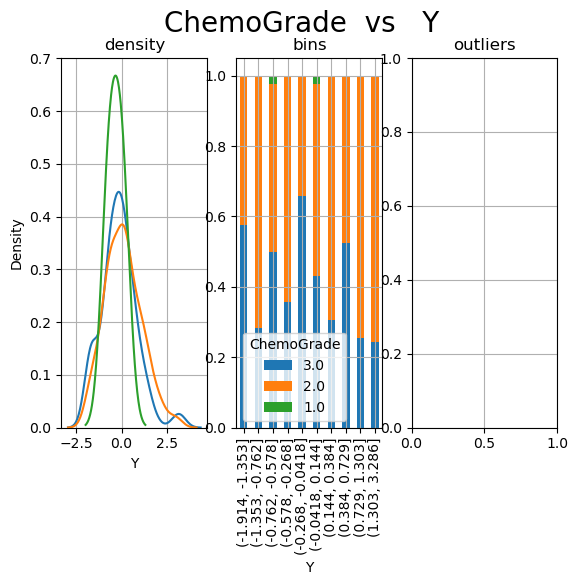

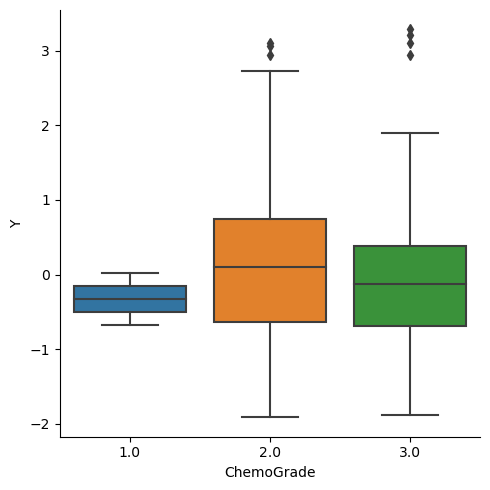

In [27]:
# check correlation between ChemoGrade and Y label
cat, num = "ChemoGrade", 'Y'
fig,ax= plt.subplots(nrows=1,ncols =3,sharex =False, sharey= False)
fig.suptitle(cat+"  vs   "+num, fontsize =20)

#distribution
ax[0].title.set_text('density')
for i in df_pca[cat].unique():
    sns.distplot(df_pca[df_pca[cat]==i][num],hist=False,label=i,ax=ax[0])
ax[0].grid(True)

### stacked
ax[1].title.set_text('bins')
breaks = np.quantile(df_pca[num], q=np.linspace(0,1,11))
tmp = df_pca.groupby([cat, pd.cut(df_pca[num], breaks, duplicates='drop')]).size().unstack().T
tmp = tmp[df_pca[cat].unique()]
tmp["tot"] = tmp.sum(axis=1)
for col in tmp.drop("tot", axis=1).columns:
     tmp[col] = tmp[col] / tmp["tot"]
tmp.drop("tot", axis=1).plot(kind='bar', stacked=True, ax=ax[1], legend=True, grid=True)

### boxplot   
ax[2].title.set_text('outliers')
sns.catplot(x=cat, y=num, data=df_pca, kind="box", ax=ax[2])
ax[2].grid(True)
plt.show()


---
# Feature Selection

In [28]:
df_pca.shape

(400, 36)

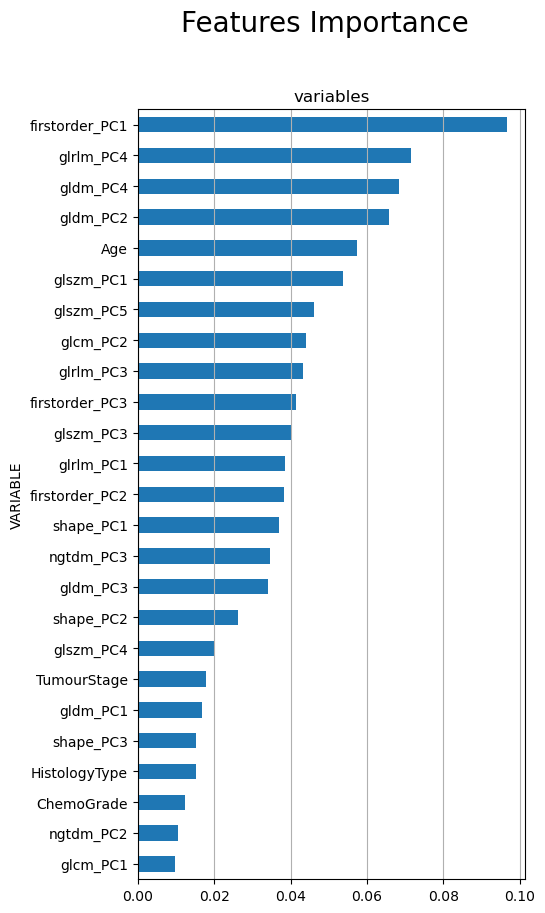

In [29]:
#feature importance
X = df_pca.drop("Y", axis=1).values
y = df_pca["Y"].values
feature_names = df_pca.drop("Y", axis=1).columns.tolist()
## call model
model = ensemble.GradientBoostingRegressor()
## Importance
model.fit(X,y)
importances = model.feature_importances_

# Put in a pandas dtf
dtf_importances = pd.DataFrame({"IMPORTANCE":importances, "VARIABLE":feature_names}).sort_values("IMPORTANCE", ascending=False)
#dtf_importances['cumsum'] =  dtf_importances['IMPORTANCE'].cumsum(axis=0) 
dtf_importances = dtf_importances.set_index("VARIABLE")
# dtf_importances = dtf_importances.head(20)
# sns.barplot(y = dtf_importances['VARIABLE'], x = dtf_importances['IMPORTANCE'])
#plt.show()

# Plot
fig, ax = plt.subplots(nrows=1, ncols=1, sharex=False, sharey=False)
fig.suptitle("Features Importance", fontsize=20)
ax.title.set_text('variables')
dtf_importances_2 = dtf_importances.sort_values(by=["IMPORTANCE"], ascending=False).head(25)
dtf_importances_2 = dtf_importances_2.sort_values(by=["IMPORTANCE"], ascending=True)
dtf_importances_2["IMPORTANCE"].plot(kind="barh", legend=False, ax=ax, figsize=(5,10)).grid(axis="x")
plt.show()

# ax.set(ylabel="")
# ax[1].title.set_text('cumulative')
# dtf_importances = dtf_importances.sort_values("cumsum", ascending=False)
# dtf_importances["cumsum"].iloc[:10].plot(kind="line", linewidth=4, legend=False, ax=ax[1])
# ax[1].set(xlabel="", xticks=np.arange(len(dtf_importances.iloc[:21])), 
#           xticklabels=dtf_importances.index)
# plt.xticks(rotation=70)
# plt.grid(axis='both')


### Relief

In [30]:
df_pca.head()

,Y,Age,ER,TumourStage,shape_PC1,shape_PC2,shape_PC3,firstorder_PC1,firstorder_PC2,firstorder_PC3,...,ngtdm_PC2,ngtdm_PC3,ngtdm_PC4,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,LNStatus
0,3.286166,-1.000027,0,2,-1.317149,1.535464,-0.687496,-6.430842,1.747316,2.875226,...,0.011982,-0.106560,-1.405935,0.0,0.0,1.0,3.0,3.0,1.0,1.0
1,3.211345,-1.184344,1,2,-0.342770,-0.340519,-0.343955,-1.299775,-1.935955,0.533117,...,-0.022824,-0.278072,0.447110,1.0,0.0,0.0,3.0,3.0,1.0,1.0
2,2.949470,-1.921612,0,2,-0.951267,-0.071311,-0.145338,-2.295770,-1.963495,1.976563,...,-0.008657,-0.268030,0.489189,0.0,0.0,1.0,2.0,1.0,1.0,0.0
3,-1.652050,-1.552978,0,3,1.368046,0.069716,-0.421970,-1.828998,-2.647409,-0.013912,...,-0.021444,-0.250253,0.583694,0.0,0.0,1.0,3.0,3.0,1.0,1.0
4,1.976791,0.843142,1,2,-1.917008,1.463455,-0.345259,-3.036988,-1.528892,-0.304777,...,-0.011374,-0.284988,0.410507,0.0,0.0,0.0,2.0,1.0,1.0,0.0


In [32]:
# relief: regression
X = df_pca.iloc[:, 1:36].values
y = df_pca.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
r = sr.RReliefF(n_features = 20)
print(r.fit_transform(X_train,y_train))
# a RReliefF used in filter method will rank all the features, based on importance.

[[ 1.11458131  2.00976157  0.39687098 ... -0.5661859  -0.0311163
   1.        ]
 [-2.2990858   1.14593376 -0.48096794 ... -0.4947908  -0.0098259
   1.        ]
 [ 1.94067166  0.60840881  0.28729527 ... -0.94728922 -0.02719926
   0.        ]
 ...
 [-0.07911259  0.34535397  0.04401797 ... -0.93389286 -0.00691734
   1.        ]
 [ 0.73723923  1.14054556  0.64087926 ...  0.20506546 -0.008634
   0.        ]
 [-0.77736917  2.65802396 -0.23314134 ...  2.00534099 -0.01043113
   0.        ]]


In [33]:
from sklearn.ensemble import RandomForestRegressor
nof_list=np.arange(1,10)            
high_score=0
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    fs = sr.RReliefF(n_features = nof_list[n])
    relief = Pipeline([('fs', fs), ('m', RandomForestRegressor())])
    relief.fit(X_train,y_train)
    score = relief.score(X_test,y_test)
    score_list.append(score)
    print(f'NOF: {nof_list[n]}, Score: {score}')
    if(score > high_score):
        high_score = score
        nof = nof_list[n]

print (print(f'High Score: NOF: {nof}, Score: {high_score}'))

NOF: 1, Score: 0.021432588843758316
NOF: 2, Score: -0.20177463450094657
NOF: 3, Score: -0.16121896976852312
NOF: 4, Score: 0.04743038376248454
NOF: 5, Score: -0.01126247992034024
NOF: 6, Score: -0.047896381945899735
NOF: 7, Score: -0.02957719995973629
NOF: 8, Score: -0.16826209954779614
NOF: 9, Score: -0.012071887914939294
High Score: NOF: 4, Score: 0.04743038376248454
None
